 # Рахель Марк БПМ 161
 # Лабораторная работа №2
 # Вариант 19

# № 2.1.19

Даны два уравнения $f(x)=0$ и $g(x)=0$. Найти методом бисекции с точностью $\epsilon = 10^{-10}$ все корни уравнений, находящиеся на отрезке $[a,b]$. 
$$f(x) = (\cos{x})^2-\frac{2}{35}\cos{x}-\frac{1}{35}$$
$$g(x) = (\cos{x})^2-\frac{2}{5}\cos{x}+\frac{1}{25}$$
где $a = 0, b = 3$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

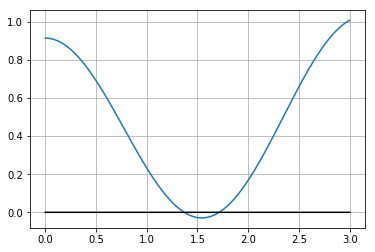

In [2]:
x = np.arange(0,3,0.0001)
y = np.cos(x)**2 - (2/35)*np.cos(x) - 1/35
plt.grid(True)
plt.plot(x,y)
plt.plot(x,x*0,'k')
plt.show()

Раскладывая функцию $f(x)$ на множители, получим
$$f(x)=(\cos{x}-\frac{1}{5})(\cos{x}+\frac{1}{7})=0$$
То есть 
$$x=\arccos{\frac{1}{5}}, \quad x=\arccos{(-\frac{1}{7})}=\pi-\arccos\frac{1}{7}$$
Вычислим корни методом бисекции, выбрав по графику два отрезка локализации $[1,\frac{3}{2}]$ и $[\frac{3}{2},2]$:

In [3]:
def f(x):
    return np.cos(x)**2 - (2/35)*np.cos(x) - 1/35
def bisec(f,a,b,eps):
    a_n=a
    b_n=b
    k=0
    while (b_n-a_n)/2 > eps:
        x_n=(a_n+b_n)/2
        if f(a_n)*f(x_n)<=0:
            b_n=x_n
        else:
            a_n=x_n
        k+=1
    return (a_n+b_n)/2, k
print('x1 = %.10f, iterations: %d' %bisec(f,1,1.5,10**(-10)))
print('x2 = %.10f, iterations: %d' %bisec(f,1.5,2,10**(-10)))

x1 = 1.3694384060, iterations: 32
x2 = 1.7141438957, iterations: 32


Сравним с округленными до десятого знака значениями наших корней:

In [4]:
print('%.10f'%np.arccos(0.2))
print('%.10f'%(np.pi-np.arccos(1/7)))

1.3694384060
1.7141438957


Теперь посчитаем с помощью функции root:

In [5]:
root = optimize.root(f, [1,2]).x.tolist()
print('x1 = %.10f' %(float(root[0])))
print('x2 = %.10f' %(float(root[1])))

x1 = 1.3694384059
x2 = 1.7141438955


Проделаем то же самое для функции $g(x)$

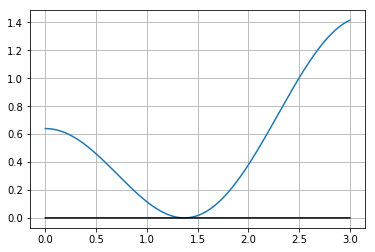

In [6]:
x = np.arange(0,3,0.0001)
y = np.cos(x)**2 - (2/5)*np.cos(x) + 1/25
plt.grid(True)
plt.plot(x,y)
plt.plot(x,x*0,'k')
plt.show()

Функция $g(x)$ раскладывается в полный квадрат 
$$g(x) = (\cos{x}-\frac{1}{5})^2=0$$
То есть
$$x=\arccos{\frac{1}{5}}$$
По графику видно, что корень находится на отрезке $[1,\frac{3}{2}]$. Попробуем вычислить его методом бисекции:

In [7]:
def g(x):
    return np.cos(x)**2-(2/5)*np.cos(x)+(1/25)
print('x = %.10f, iterations: %d' %bisec(g,1,1.5,10**(-10)))

x = 1.4999999999, iterations: 32


Далее сравним с округленным значением нашего корня:

И с результатом вычисления с помощью функции root:

In [8]:
root = optimize.root(g, [1,1.5]).x.tolist()
print('x1 = %.10f' %(float(root[0])))

x1 = 1.3694384067


Видно, что метод бисекции не дает верного результата, так как присутствует кратный корень, из-за чего нельзя выбрать отрезок, на котором функция будет иметь разный знак

# № 2.2.4

Найти наибольший по модулю корень уравнения $f(x)=0$ с точностью $\epsilon = 10^{-6}$ методами бисекции и Ньютона
$$f(x)=(x+1)e^{x+1}-x-2$$


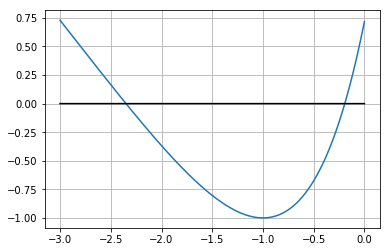

In [9]:
x = np.arange(-3,0,0.0001)
y = (x+1)*np.exp(x+1)-x-2
plt.grid(True)
plt.plot(x,y)
plt.plot(x,x*0,'k')
plt.show()

На графике видно, что наибольший по модулю корень находится на отрезке $[-\frac{5}{2},2]$. Вычислим его методом бисекции:

In [10]:
def f(x):
    return (x+1)*np.exp(x+1)-x-2
print('x = %.6f, iterations: %d' %bisec(f,-2.5,-2,10**(-6)))

x = -2.349977, iterations: 18


Затем методом Ньютона:

In [11]:
def d_f(x):
    return (x+1)*np.exp(x+1)-1
def newt(x0,f,d_f,eps):
    k=0
    while True:
        x1=x0-f(x0)/d_f(x0)
        k+=1
        if abs(x1-x0)<eps:
            return x1, k
        x0=x1
print('x = %.6f, iterations: %d' %newt(-2.5,f,d_f,10**(-6)))

x = -2.349977, iterations: 9


В данной задаче метод Ньютона эффективней, так как дает тот же результат за меньшее количество итераций

# № 2.10.2

Функция $y=f(x)$ задана неявно уравнением $F(x,y)=0$. На отрезке $[1,5]$ построить таблицу значений функции $y=f(x)$ с шагом $h=0.5$, применяя один из методов численного решения нелинейного уравнения (точность $\epsilon=10^{-7}$) Построить график функции $y=f(x)$ на заданном отрезке
$$F(x,y) = \cosh(y e^y+\frac{x}{20})+\frac{1}{\arctan{(20ye^y+x)}}-13=0$$
$$1\leq x\leq 5, \quad 1\leq y \leq \frac{3}{2}$$

Пройдем по отрезку $[1,5]$ с шагом $0.5$ и для каждого заданного $x^*$ будем методом бисекции находить корень уравнения $F(x^*,y)=0$, которое в таком случае будет уже уравнением от одной переменной:

In [12]:
def u(x,y):
    return np.cosh(y*np.exp(y)+(x/20))+1/(np.arctan(20*y*np.exp(y)+x))-13
def f(y):
        return u(x,y)
for x in np.arange(1,5.1,0.5):
    print('x = %.1f' %x)
    print('y = %.7f' %bisec(f,1,1.5,10**(-7))[0])

x = 1.0
y = 1.0759838
x = 1.5
y = 1.0718653
x = 2.0
y = 1.0677214
x = 2.5
y = 1.0635518
x = 3.0
y = 1.0593564
x = 3.5
y = 1.0551346
x = 4.0
y = 1.0508861
x = 4.5
y = 1.0466107
x = 5.0
y = 1.0423078


Построим график, действуя таким же способом, но с меньшим шагом по $x$:

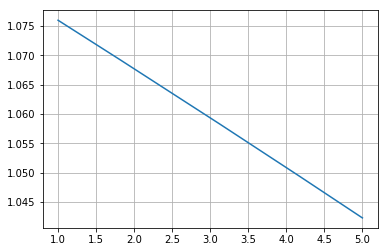

In [13]:
X = []
Y = []
j = 0
for x in np.arange(1,5.0001,0.001):
    X.insert(j,x)
    Y.insert(j,bisec(f,1,1.5,10**(-7))[0])
    j+=1
plt.plot(X,Y)
plt.grid(True)
plt.show()